In [1]:
import random
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from brainbot.plan.samplers import *
from brainbot.plan.regions import *
from brainbot.utils.tf import *

pybullet build time: May 20 2022 19:45:31


# Visualize grid

In [9]:
# Reset sampler each time
sampler = DeterministicGridSampler([0,0,0], [1,1,1], [10,10,10])

xs = []
ys = []
zs = []
num_samples = 5000

for i in range(num_samples):
    x,y,z = sampler.next() 
    xs.append(x)
    ys.append(y)
    zs.append(z)
    

/tmp/ipykernel_212758/3767745649.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


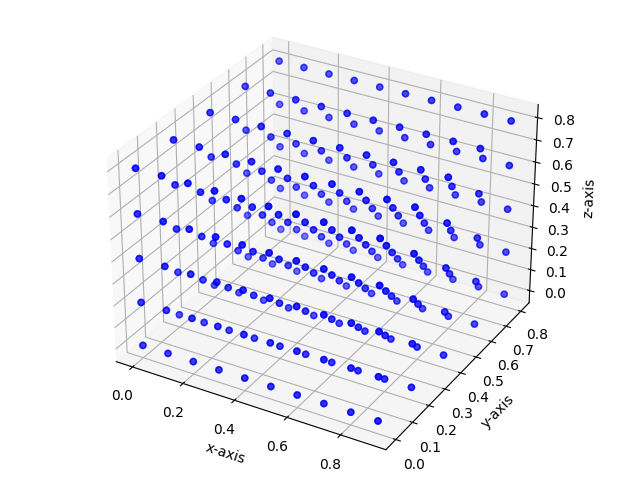

In [10]:
%matplotlib widget

# creating figure
fig = plt.figure()
ax = Axes3D(fig)
  
# creating the plot
plot_geeks = ax.scatter(xs, ys, zs, color=[0,0,1,0.1])
# plot_geeks = ax.scatter(xs_o, ys_o, zs_o, color=[1,0,0,0.1])
  
# setting title and labels
ax.set_title("Cylinder Sampling")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
  
# displaying the plot
plt.show()

# Visualize grid sampler inside cyl

In [8]:
cyl = Cyl(1, 1, toTransform([0,0,0],[0,0,0]))

In [15]:
# Reset sampler each time
sampler = RegionGridSampler(cyl, [40,40,30])

xs = []
ys = []
zs = []
num_samples = 5000

for i in range(num_samples):
    x,y,z = sampler.next() 
    xs.append(x)
    ys.append(y)
    zs.append(z)
    

/tmp/ipykernel_190641/3767745649.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


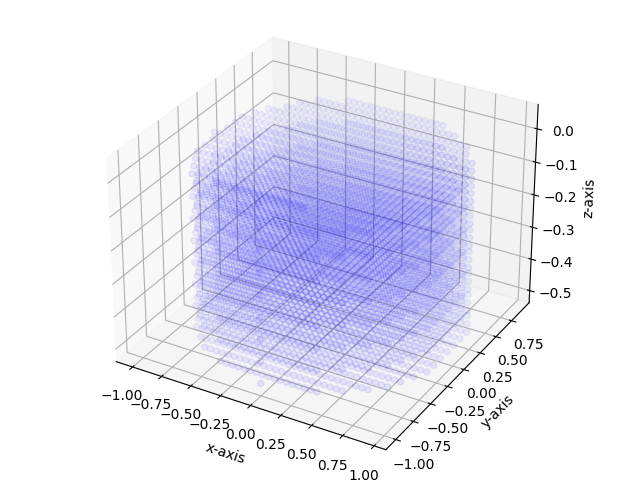

In [16]:
%matplotlib widget

# creating figure
fig = plt.figure()
ax = Axes3D(fig)
  
# creating the plot
plot_geeks = ax.scatter(xs, ys, zs, color=[0,0,1,0.1])
# plot_geeks = ax.scatter(xs_o, ys_o, zs_o, color=[1,0,0,0.1])
  
# setting title and labels
ax.set_title("Cylinder Sampling")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
  
# displaying the plot
plt.show()